In [29]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [30]:
data = pd.read_csv('heart.csv')
df = pd.read_csv('heart.csv')
data.head()
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Data contains

##### age - age in years
##### sex - (1 = male; 0 = female)
##### cp - chest pain type - (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4=asymptomatic)
##### trestbps - resting blood pressure (in mm Hg on admission to the hospital)
##### chol - serum cholestoral in mg/dl
##### fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
##### restecg - resting electrocardiographic results - (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)
##### thalach - maximum heart rate achieved
##### exang - exercise induced angina (1 = yes; 0 = no)
##### oldpeak - ST depression induced by exercise relative to rest
##### slope - the slope of the peak exercise ST segment - (1 = upsloping, 2 = flat, 3 = downsloping)
##### ca - number of major vessels (0-3) colored by flourosopy
##### thal - 1 = normal; 2 = fixed defect; 3 = reversable defect
##### target - have disease or not (1=yes, 0=no)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
data['sex'] = data['sex'].astype('object')
data['cp'] = data['cp'].astype('object')
data['fbs'] = data['fbs'].astype('object')
data['restecg'] = data['restecg'].astype('object')
data['exang'] = data['exang'].astype('object')
data['slope'] = data['slope'].astype('object')
data['ca'] = data['ca'].astype('object')
data['thal'] = data['thal'].astype('object')
data['target'] = data['target'].astype('object')

sex1 = []
target1 = []
for sex_value in data['sex']:
    if sex_value == 0:
        sex1.append('F') 
    else:
        sex1.append('M')
for target_value in data['target']:
    if target_value == 0:
        target1.append('N')
    else:
        target1.append('Y')
data['sex'] = sex1
data['target'] = target1

In [33]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
286,59,M,3,134,204,0,1,162,0,0.8,2,2,2,N
227,35,M,0,120,198,0,1,130,1,1.6,1,0,3,N
113,43,M,0,110,211,0,1,161,0,0.0,2,0,3,Y
134,41,F,1,126,306,0,1,163,0,0.0,2,0,2,Y
171,48,M,1,110,229,0,1,168,0,1.0,0,0,3,N


In [34]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [35]:
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


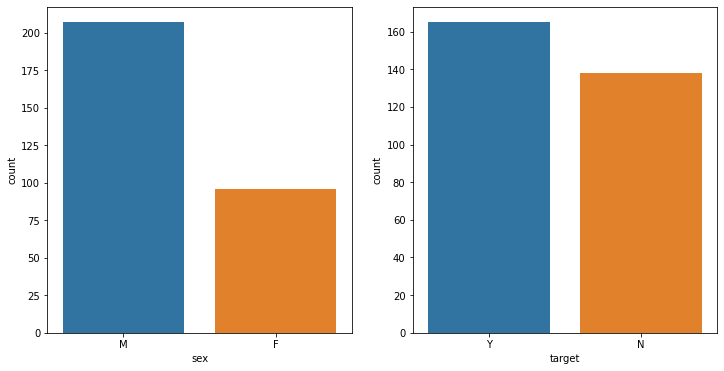

In [36]:
f,axes = plt.subplots(1,2, figsize=(12,6))
sb.countplot(data.sex, ax = axes[0])
sb.countplot(data.target, ax = axes[1])

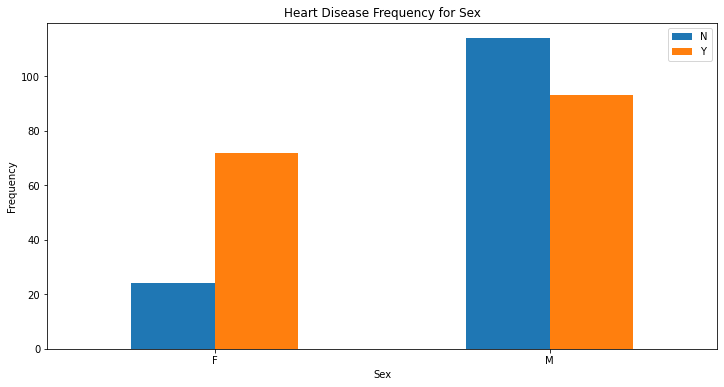

In [37]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(12,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["N", "Y"])
plt.ylabel('Frequency')
plt.show()

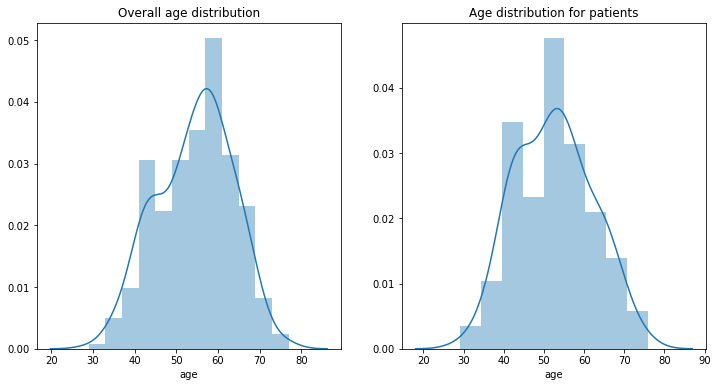

In [38]:
f,axes = plt.subplots(1,2, figsize=(12,6))
ax1 = sb.distplot(data['age'], ax = axes[0])
ax1.title.set_text('Overall age distribution')
ax2 = sb.distplot(data[data['target'] == 'Y']['age'], ax = axes[1])
ax2.title.set_text('Age distribution for patients')

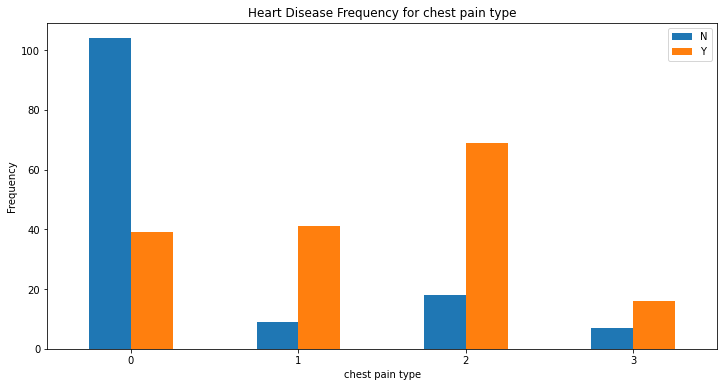

In [39]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(12,6))
plt.title('Heart Disease Frequency for chest pain type')
plt.xlabel('chest pain type')
plt.xticks(rotation=0)
plt.legend(["N", "Y"])
plt.ylabel('Frequency')
plt.show()

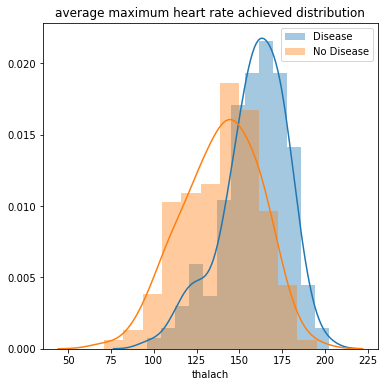

In [40]:
f,axes = plt.subplots(1,1, figsize=(6,6))
sb.distplot(data[data["target"]=='Y']['thalach'])
sb.distplot(data[data["target"]=='N']['thalach'])
plt.legend(["Disease", "No Disease"])
plt.title("average maximum heart rate achieved distribution")
plt.show()

# Create Dummy Variables

In [64]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['restecg'], prefix = "restecg")

In [65]:
frames = [df, a, b, c, d]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,1,0,1,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,0,0,1,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,1,0,0,0,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,1,0,0,0,1,0,1,0


In [66]:
df = df.drop(columns = ['cp', 'thal', 'slope', 'restecg'])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,0,1,0,1,0


In [67]:
df.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
ca             int64
target         int64
cp_0           uint8
cp_1           uint8
cp_2           uint8
cp_3           uint8
thal_0         uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
slope_0        uint8
slope_1        uint8
slope_2        uint8
restecg_0      uint8
restecg_1      uint8
restecg_2      uint8
dtype: object

# Splite x,y

In [68]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)
x_data.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
ca             int64
cp_0           uint8
cp_1           uint8
cp_2           uint8
cp_3           uint8
thal_0         uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
slope_0        uint8
slope_1        uint8
slope_2        uint8
restecg_0      uint8
restecg_1      uint8
restecg_2      uint8
dtype: object

In [69]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

# Apply Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=5000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8689


# Apply Random Forest Classification

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

print('Random Forest Algorithm Accuracy with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Random Forest Algorithm Accuracy with all the features: 0.8689


# Apply Naive Bayes Classification

In [76]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)

print('Naive Bayes Algorithm Accuracy with all the features: {0:0.4f}'. format(acc))

Naive Bayes Algorithm Accuracy with all the features: 0.8689
